In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('./data/supermarket.csv')

In [110]:
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# (1) Cleanning the data

## (1.1) Searching for missing values

In [111]:
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## (1.2) Searching for incosistent data

In [112]:
# now i am searching for data that shoudn't be in tha fiel like product name that doesn't make sense e things like this

In [113]:
df[df['Branch'] == 'C']['City'].value_counts()

Naypyitaw    328
Name: City, dtype: int64

In [114]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [115]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [116]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [117]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [118]:
# Here i just want to see if don't have 0 values
df['Unit price'].min()

10.08

In [119]:
df['Quantity'].min()

1

In [120]:
df['Tax 5%'].min()

0.5085

In [121]:
df['Total'].min()

10.6785

In [122]:
#check this varible lather in the documentation because of the max value
df['cogs'].min()

10.17

In [123]:
#check this varible lather in the documentation because of the max value
df['gross margin percentage'].min()

4.761904762

In [124]:
#check this varible lather in the documentation because of the max value
df['gross income'].min()

0.5085

# (2) - Exploratory Data Analysis

## (2.1) Some histogram

<AxesSubplot:xlabel='Unit price', ylabel='Count'>

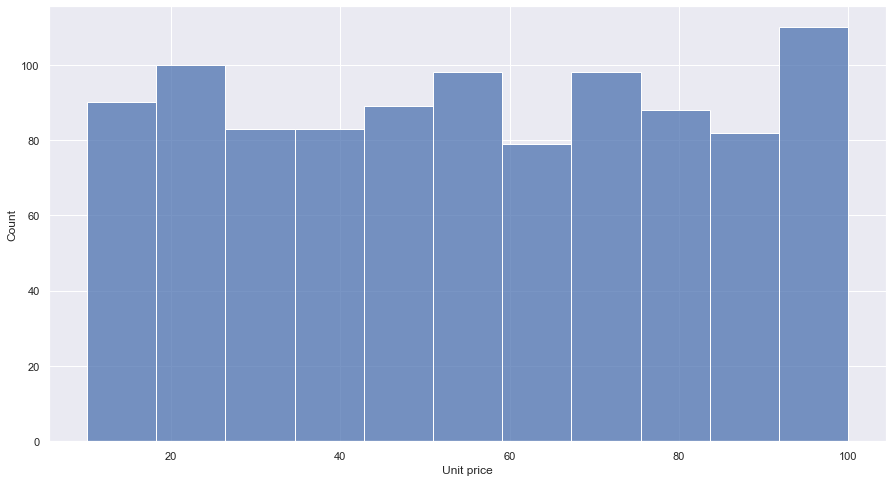

In [125]:
sns.histplot(df['Unit price'])

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

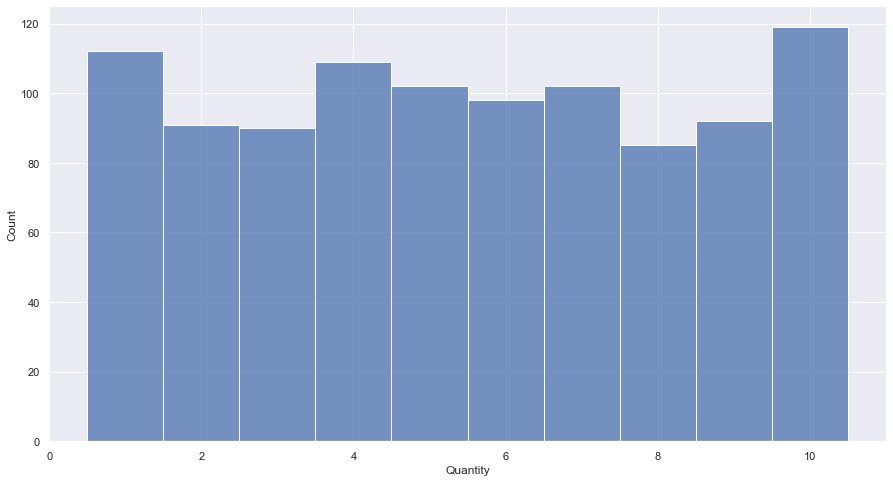

In [126]:
sns.histplot(df['Quantity'],discrete=True)

<AxesSubplot:xlabel='Total', ylabel='Count'>

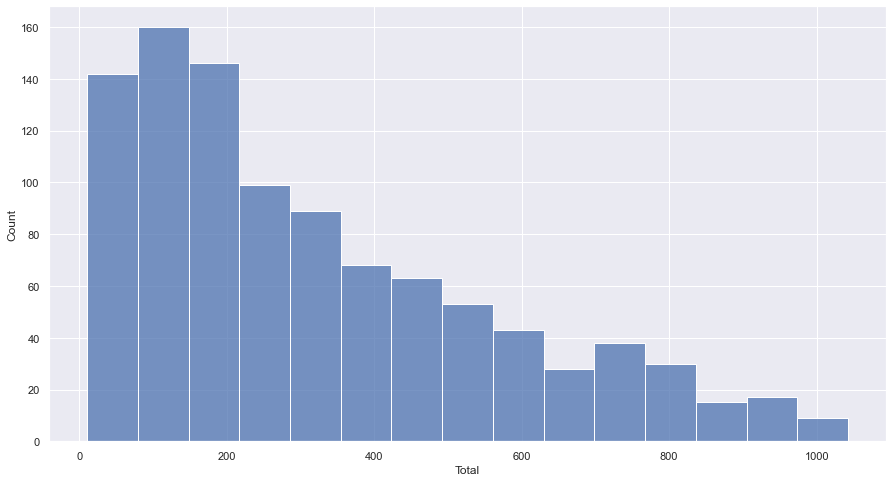

In [127]:
sns.histplot(df['Total'])

## (2.2) Some count  plots

<AxesSubplot:xlabel='Customer type', ylabel='count'>

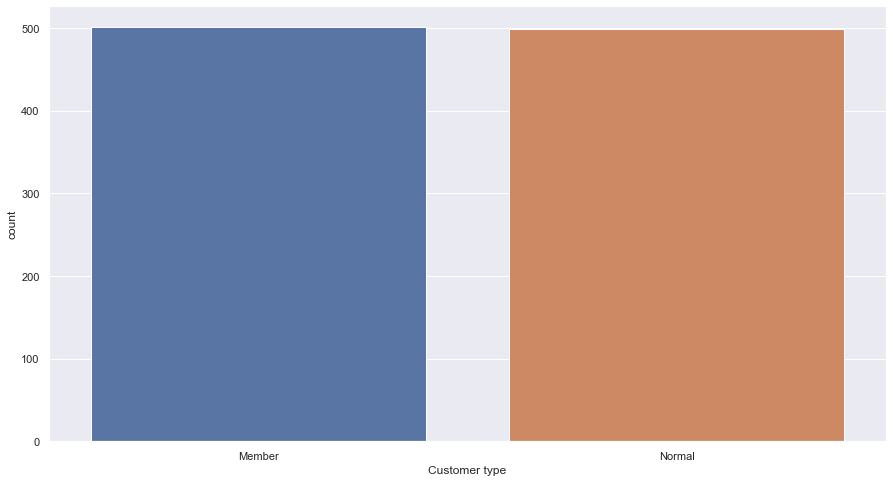

In [128]:
sns.countplot(x = 'Customer type' ,data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

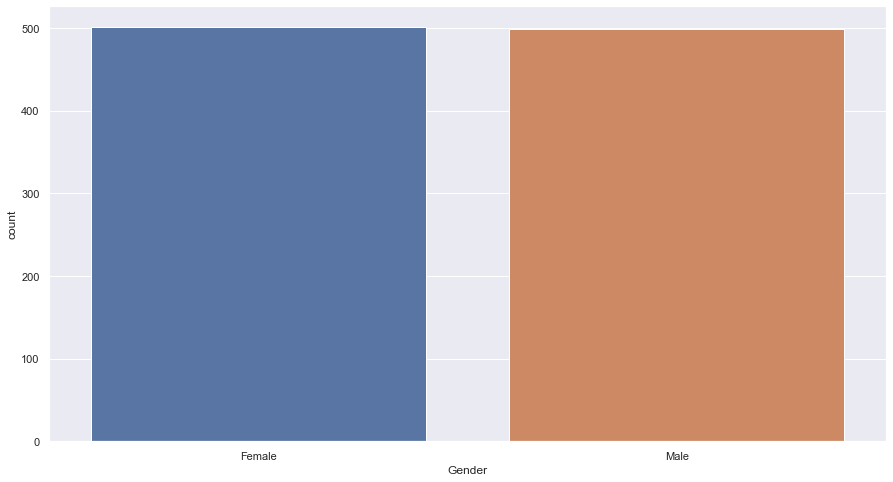

In [129]:
sns.countplot(x = 'Gender' ,data = df)

<AxesSubplot:xlabel='count', ylabel='Product line'>

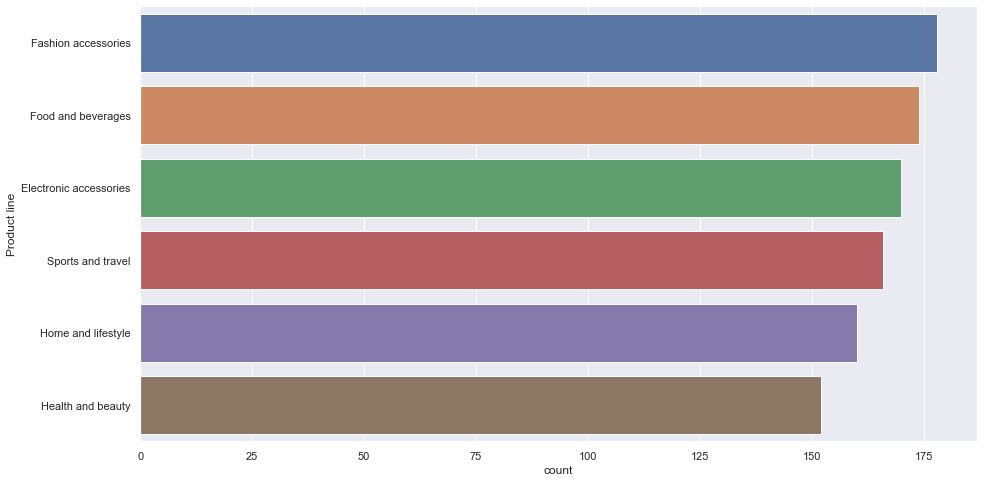

In [130]:
#star#
a = df['Product line'].value_counts().to_frame().reset_index()
sns.countplot(y = df['Product line'] ,data = df,order = a['index'])

<AxesSubplot:xlabel='count', ylabel='Payment'>

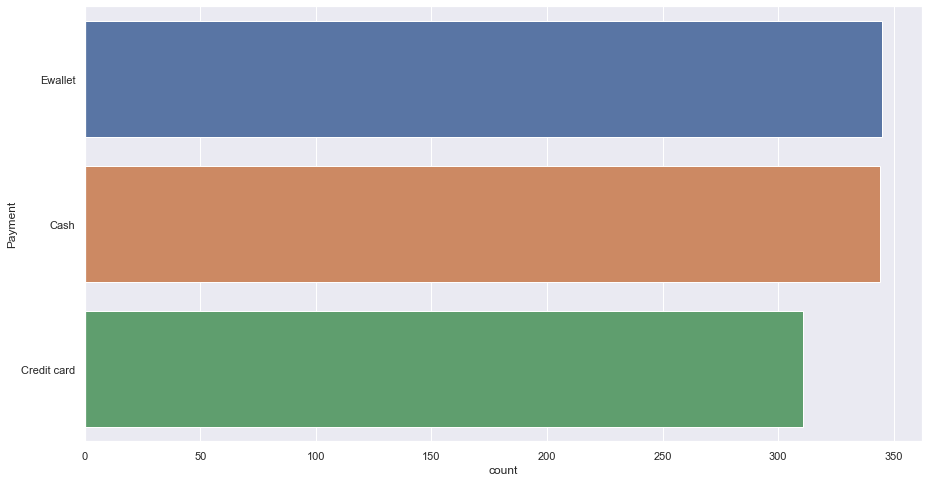

In [131]:
#star#
a = df['Payment'].value_counts().to_frame().reset_index()
sns.countplot(y = df['Payment'] ,data = df,order = a['index'])

<AxesSubplot:xlabel='count', ylabel='City'>

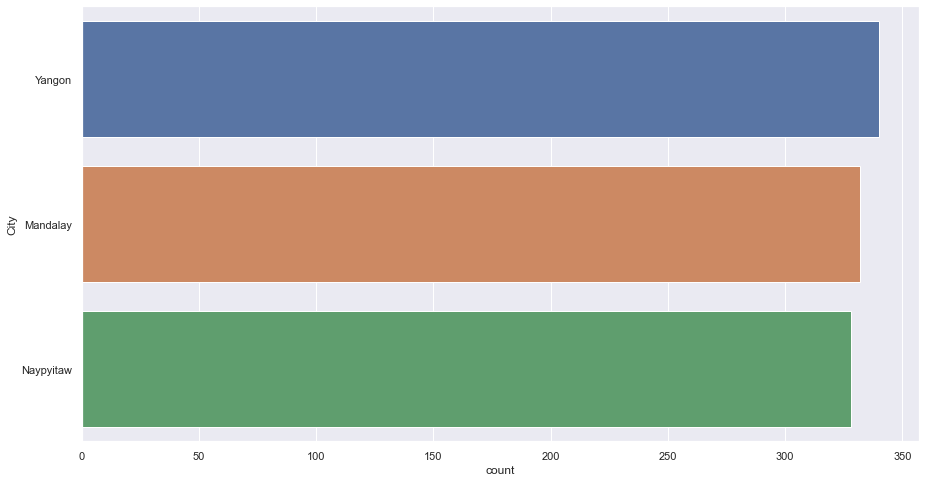

In [132]:
#star#
a = df['City'].value_counts().to_frame().reset_index()
sns.countplot(y = df['City'] ,data = df,order = a['index'])

In [133]:
def column_plot(column,hue):
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.countplot(x = column,hue=hue,data=df)
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

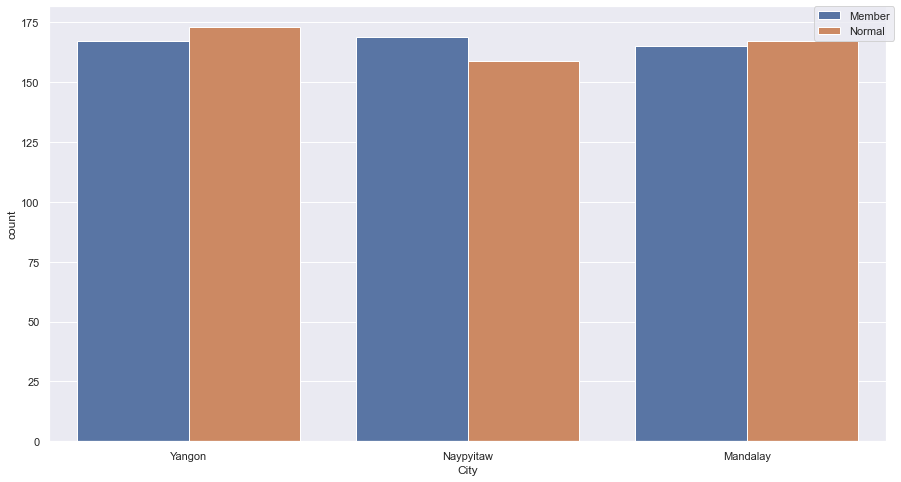

In [134]:
column_plot('City','Customer type')

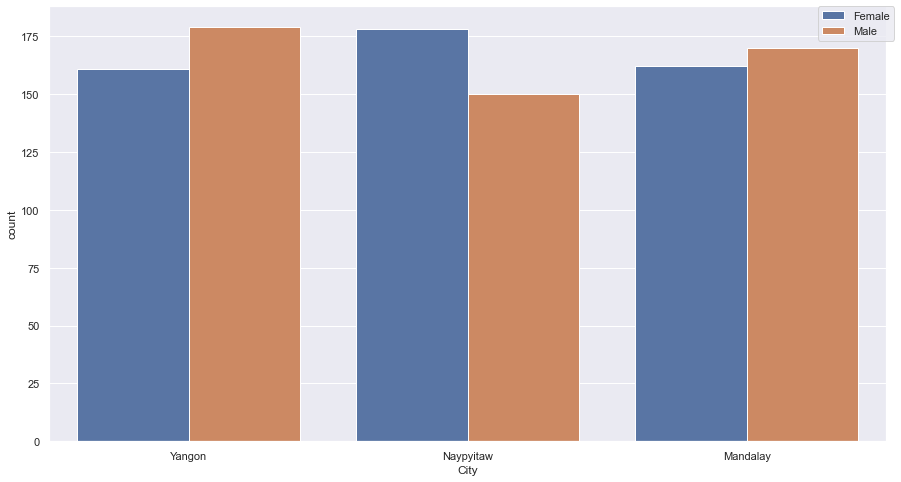

In [135]:
column_plot('City','Gender')

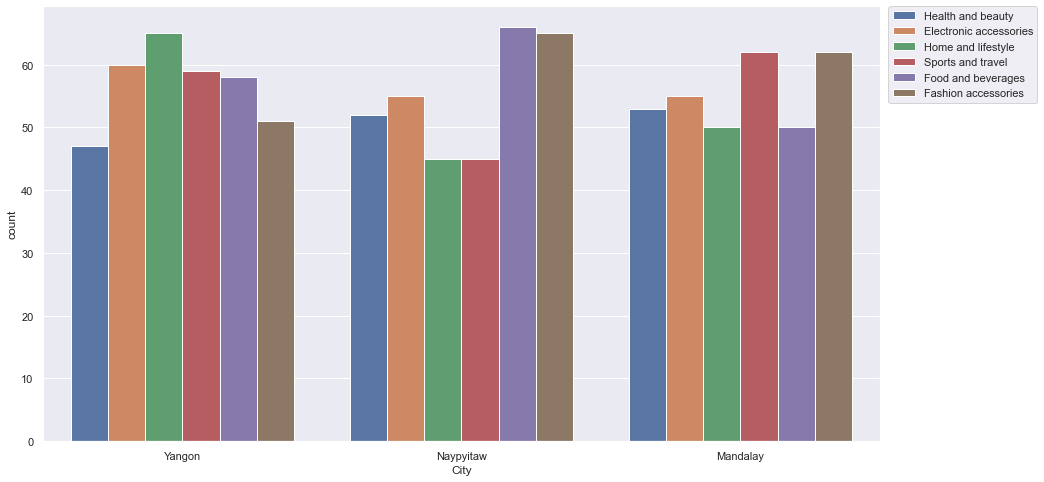

In [136]:
#Maybe take off this analisy because already have one using the quantity variable
column_plot('City','Product line')

In [137]:
#in naypitaw city has a peak of food and acessories

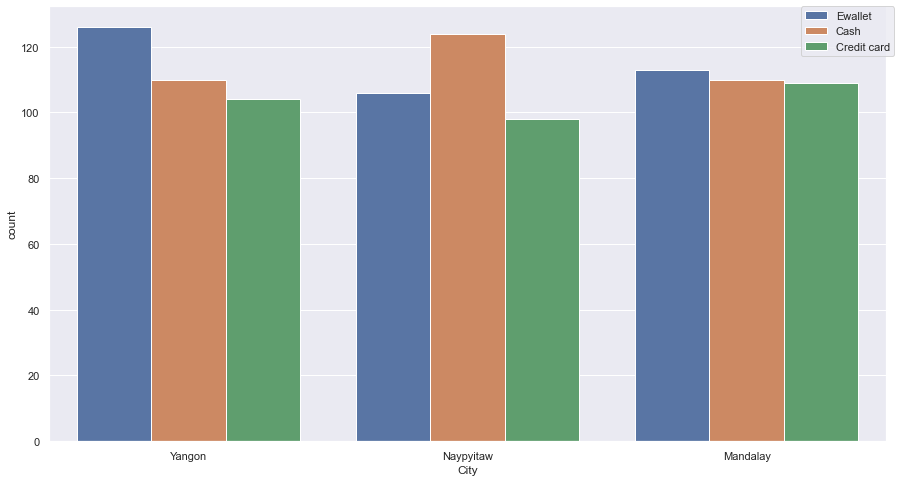

In [138]:
column_plot('City','Payment')

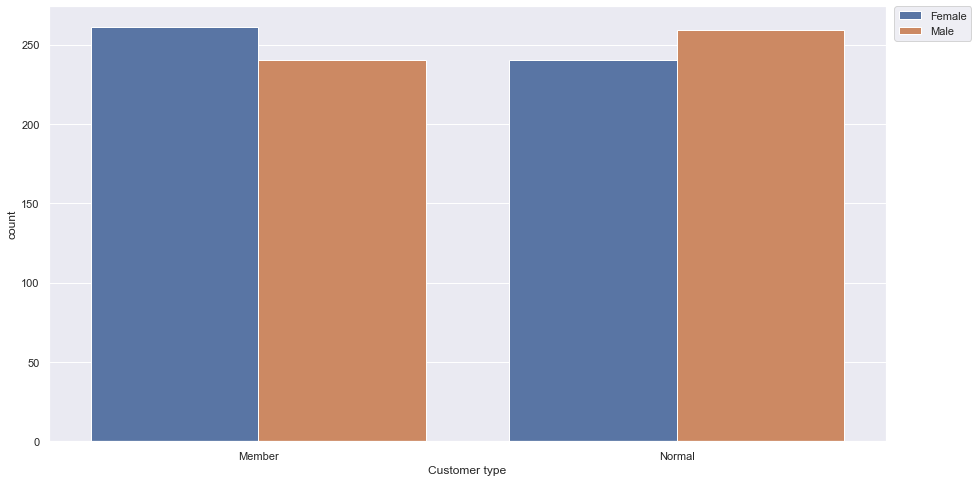

In [139]:
column_plot('Customer type','Gender')

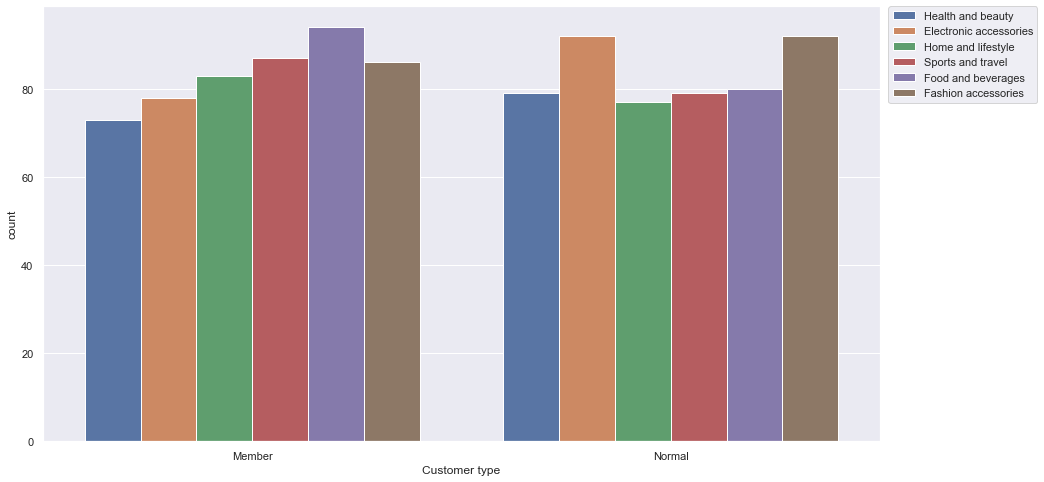

In [140]:
column_plot('Customer type','Product line')

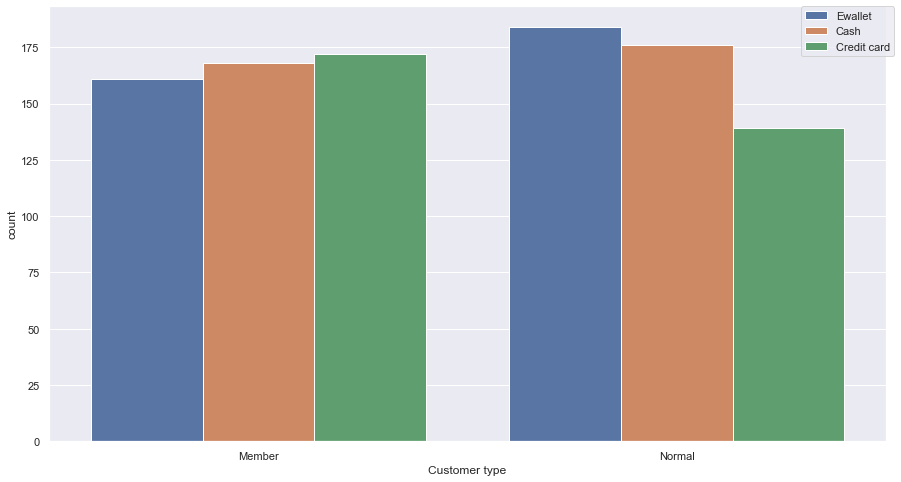

In [141]:
column_plot('Customer type','Payment')

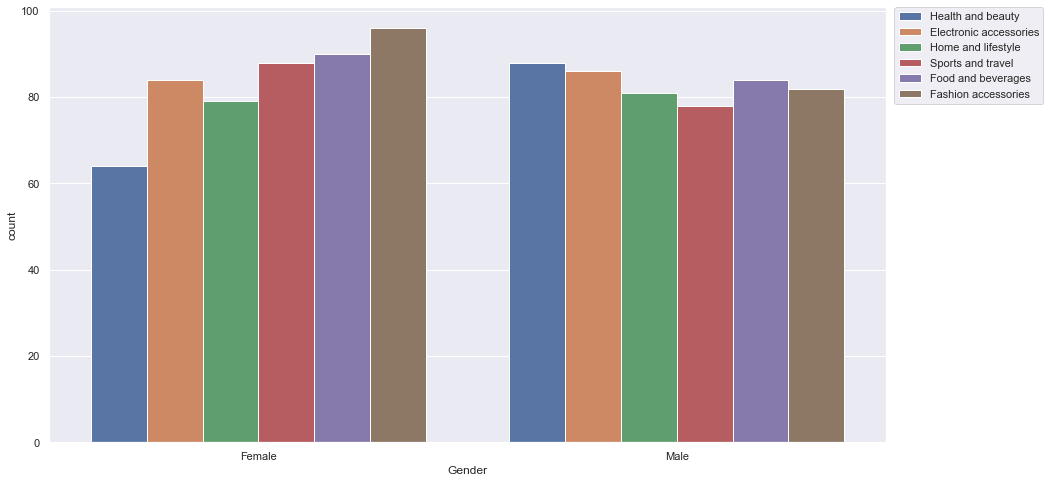

In [142]:
column_plot('Gender','Product line')

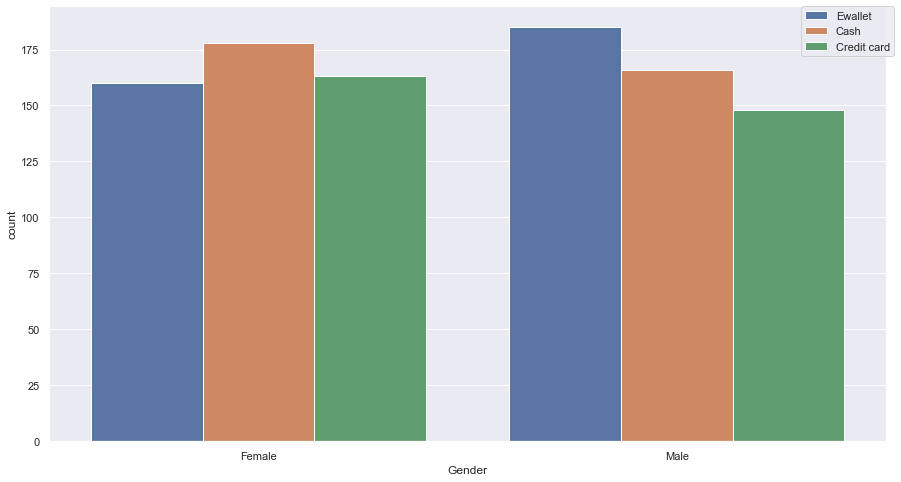

In [143]:
column_plot('Gender','Payment')

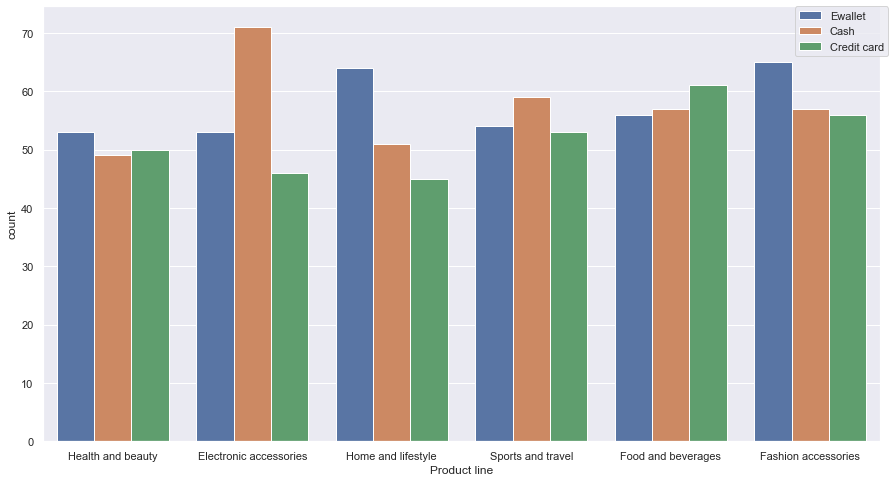

In [144]:
column_plot('Product line','Payment')

In [145]:
#most part of the eletronics buyers use cash
#Most part of the Home and lifestyle buyers use ewallet

## (2.3) Some bar plots

In [146]:
def barplot(x,y,hue):
    a = df.groupby([x,hue])[y].sum().to_frame().reset_index()
    sns.catplot(kind='bar',x=x,y=y,hue=hue,data=a,aspect=18/8)

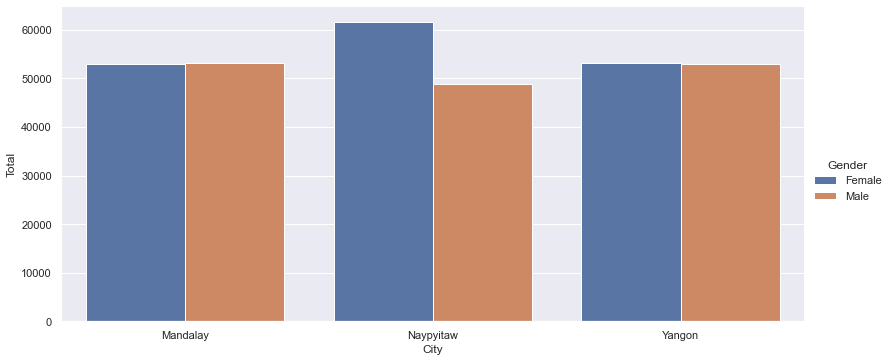

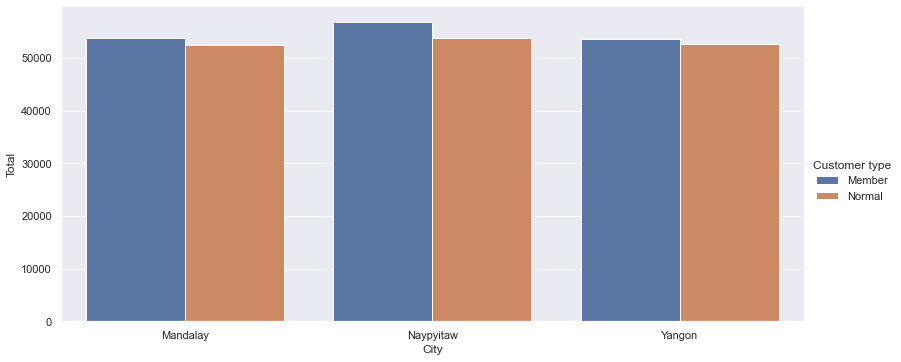

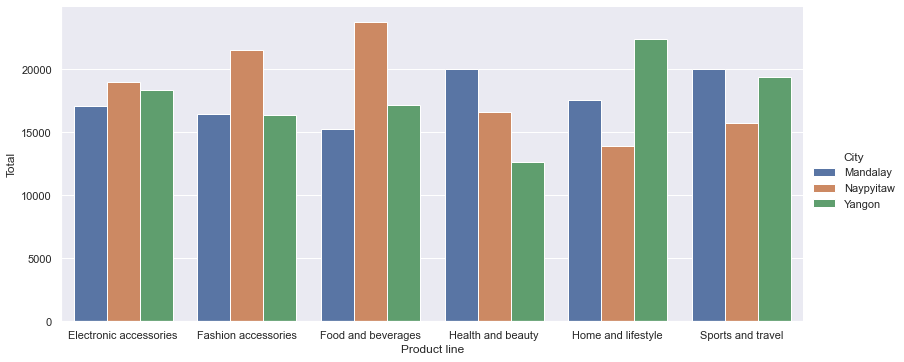

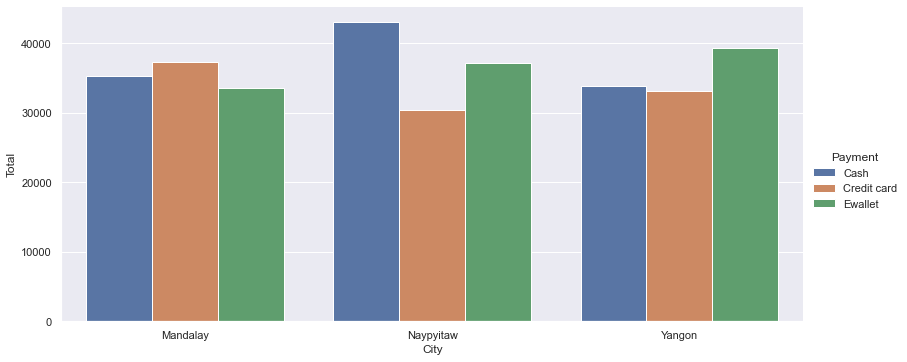

In [147]:
barplot('City','Total','Gender')
barplot('City','Total','Customer type')
barplot('Product line','Total','City')
barplot('City','Total','Payment')

In [148]:
# in naypitaw city has a considerable dinference between male and female total 
# in naypitaw city has a a lot of food and fashion revenue
# in naypitaw city uses a lot of cash
# in yangon city has a lot of home revenue

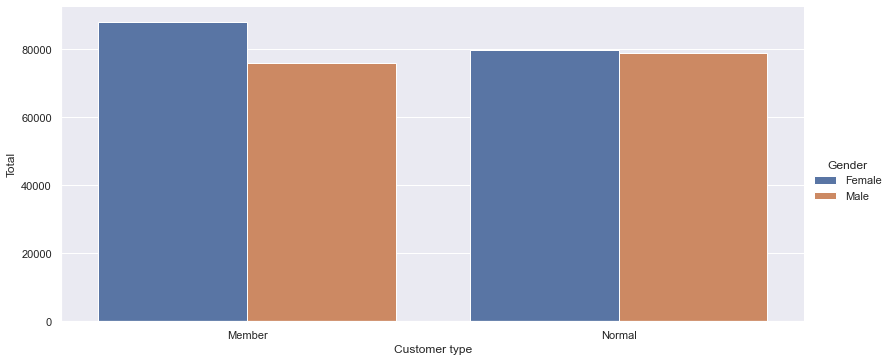

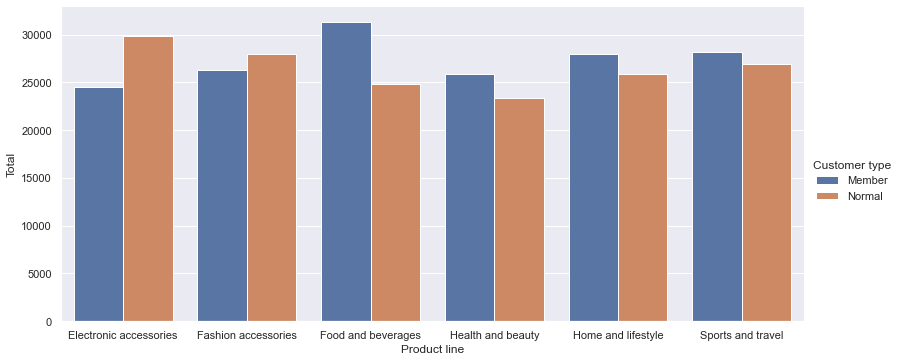

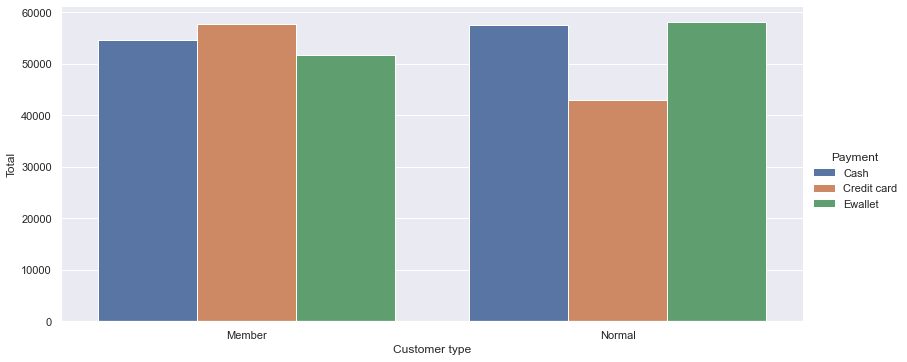

In [149]:
barplot('Customer type','Total','Gender')
barplot('Product line','Total','Customer type')
barplot('Customer type','Total','Payment')

In [150]:
#the normal buyer spend much more mone using cash and ewallet

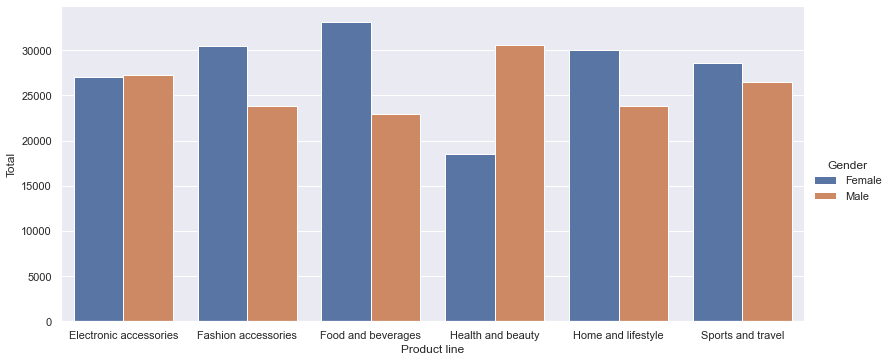

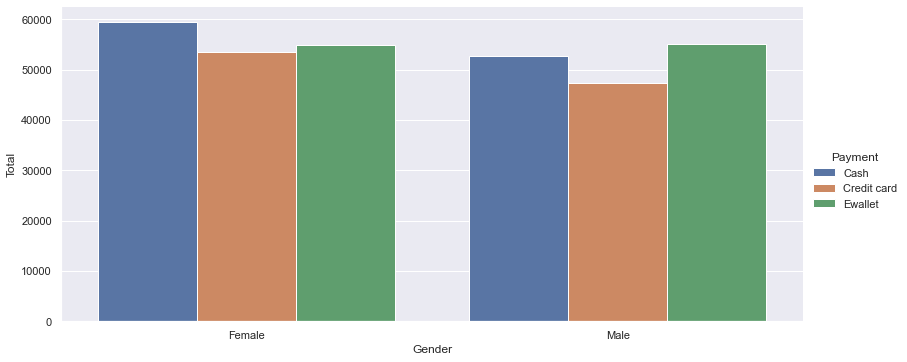

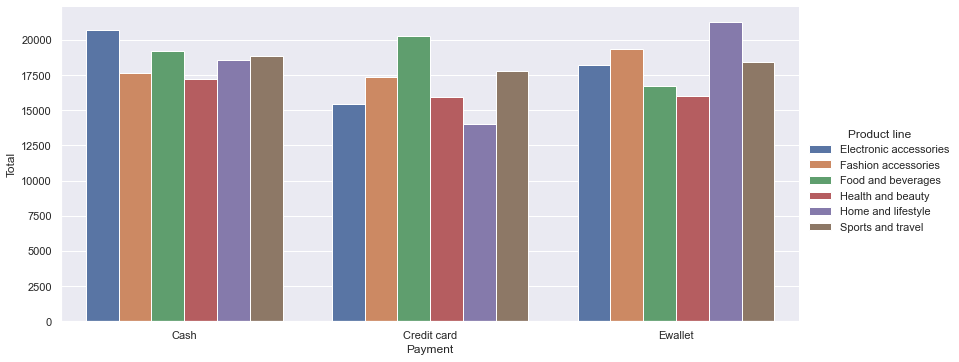

In [151]:
barplot('Product line','Total','Gender')
barplot('Gender','Total','Payment')
barplot('Payment','Total','Product line')

In [152]:
# female buys more food than man
# males buys more heath than female
# Food is a lot more payed in credit card
# Home is a lot more payed in ewallet

In [153]:
#Quantity analisi

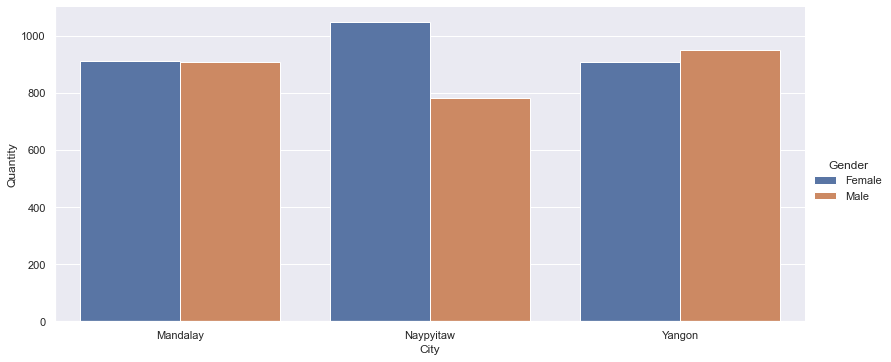

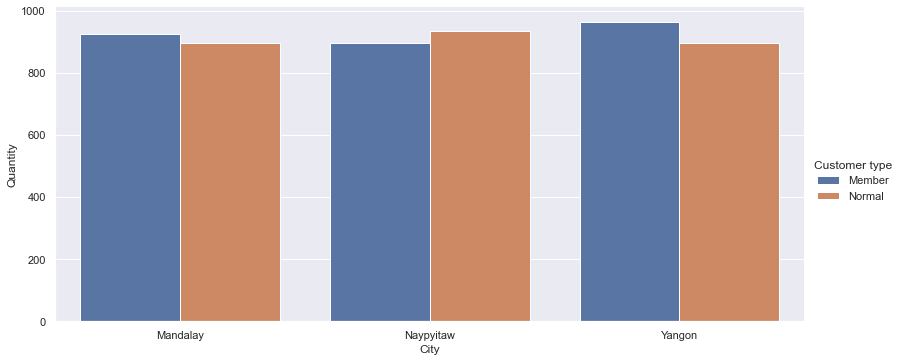

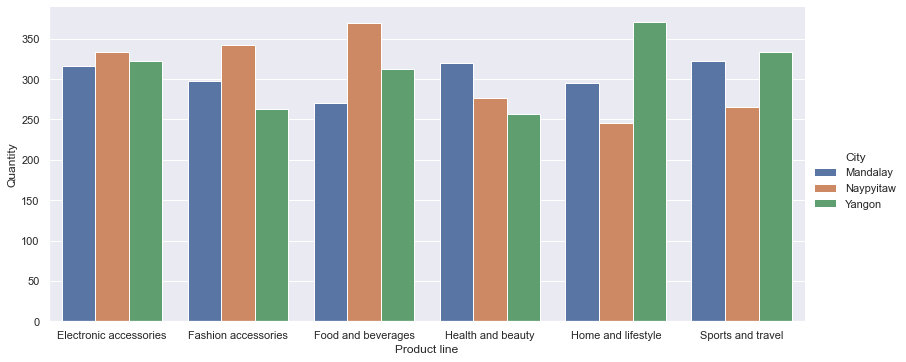

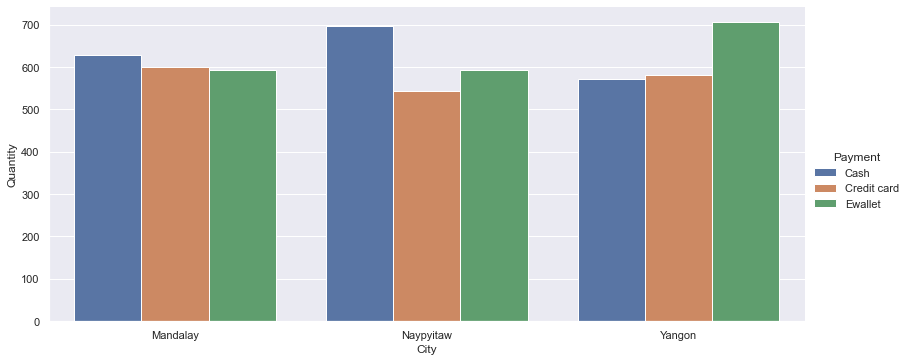

In [154]:
barplot('City','Quantity','Gender')
barplot('City','Quantity','Customer type')
barplot('Product line','Quantity','City')
barplot('City','Quantity','Payment')

In [155]:
#napytaw have much more sells of food in quantity
#yangon city have much more sells of home in quantity
#in napitaw city womans buys more in quantity than man
#Yangon city uses much more ewallet
#napytaw uses much more cash

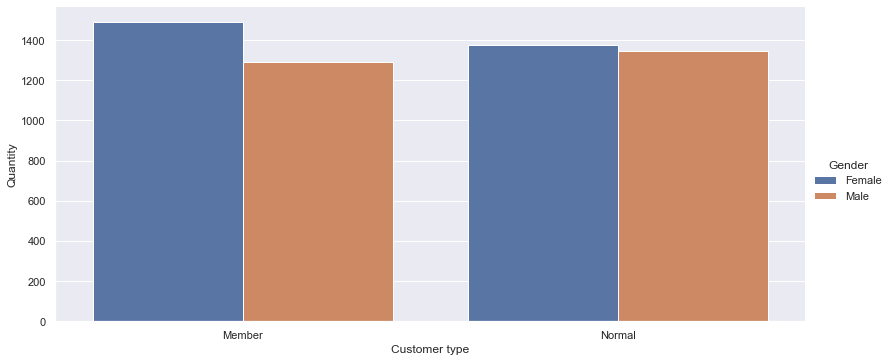

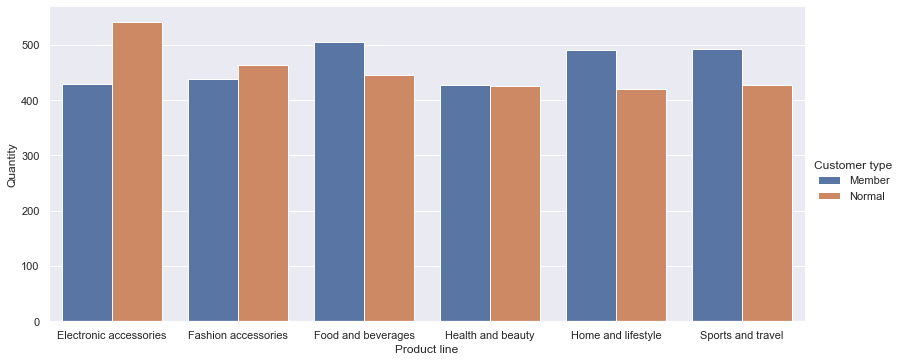

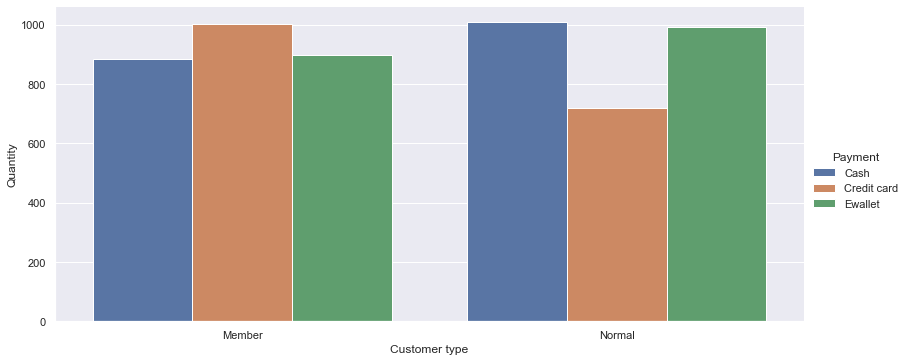

In [156]:
barplot('Customer type','Quantity','Gender')
barplot('Product line','Quantity','Customer type')
barplot('Customer type','Quantity','Payment')

In [157]:
#The normal public buy a lot more eletronics
#Normal public pays a lot more using ewallet and cash

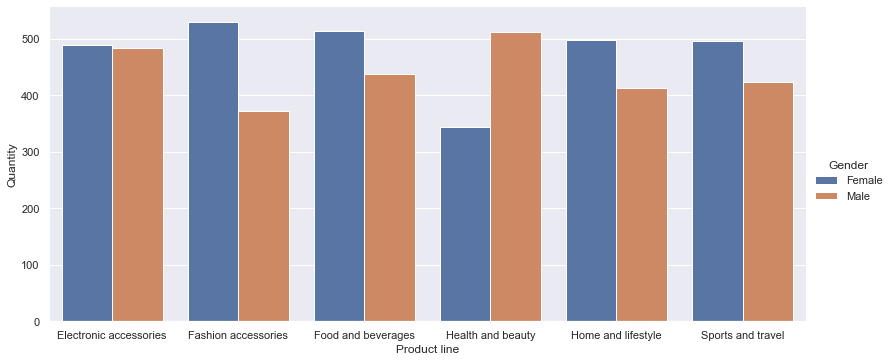

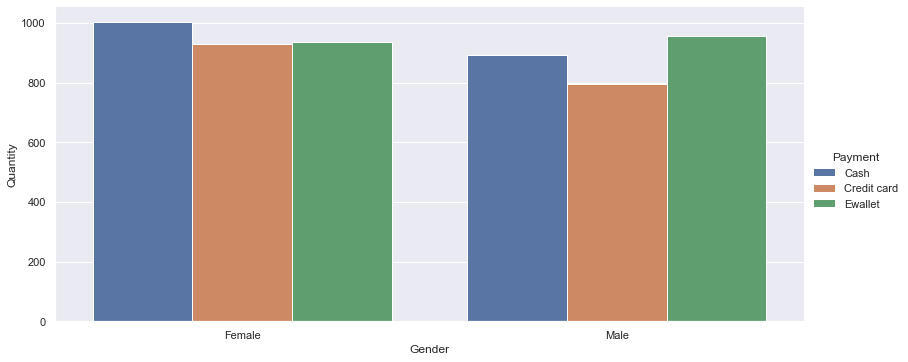

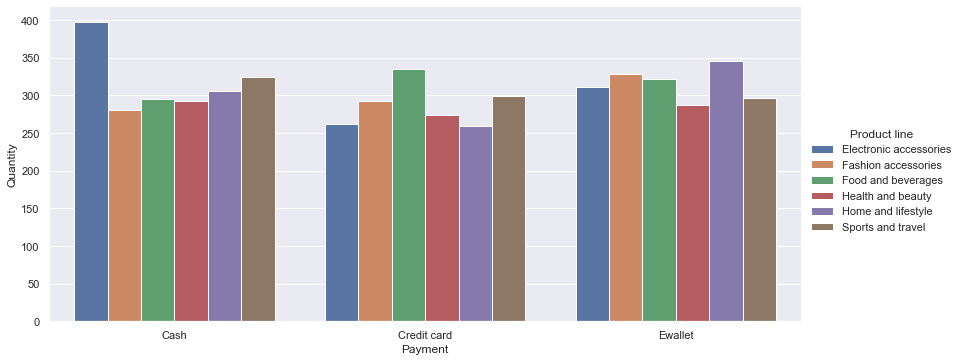

In [158]:
barplot('Product line','Quantity','Gender')
barplot('Gender','Quantity','Payment')
barplot('Payment','Quantity','Product line')

In [159]:
# female in quantity buys more fashion than man
# male in quantity buys more health than female
#People prefer pay eletronics in cash

## (2.4) Some boxplot charts

<AxesSubplot:xlabel='City', ylabel='Total'>

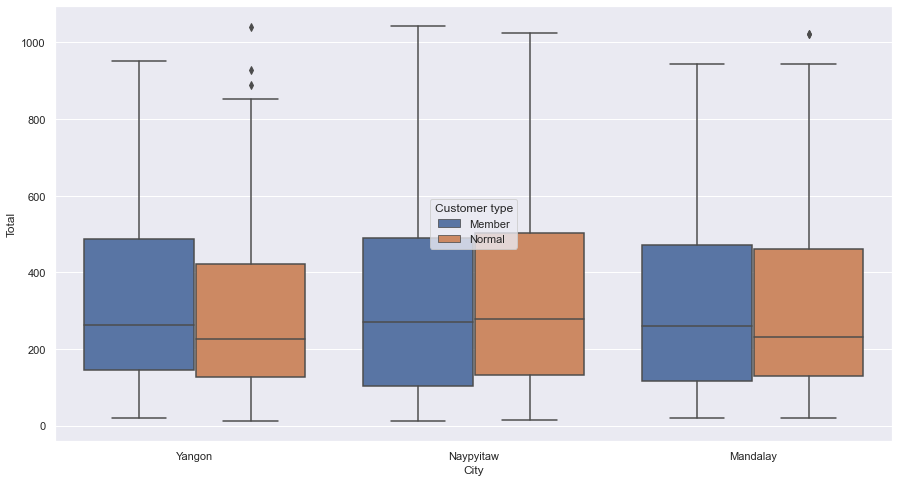

In [160]:
sns.boxplot(x='City',y='Total',hue='Customer type',data=df)

<AxesSubplot:xlabel='City', ylabel='Total'>

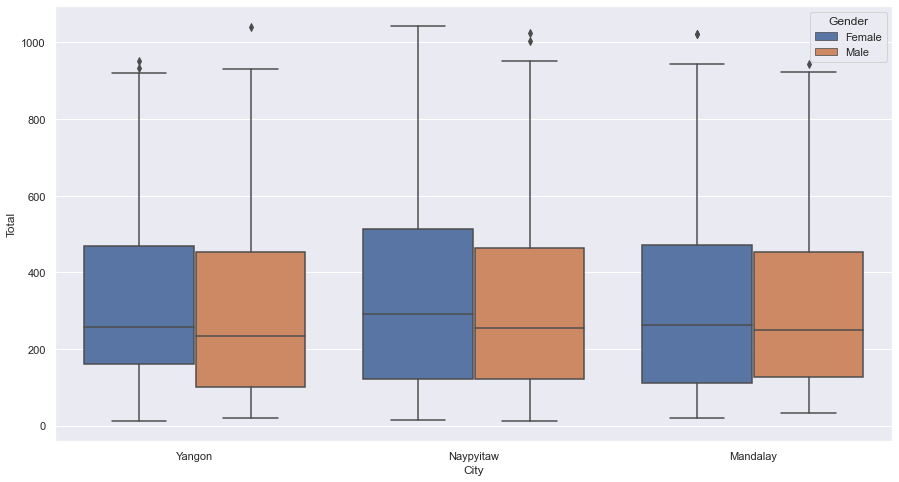

In [161]:
sns.boxplot(x='City',y='Total',hue='Gender',data=df)

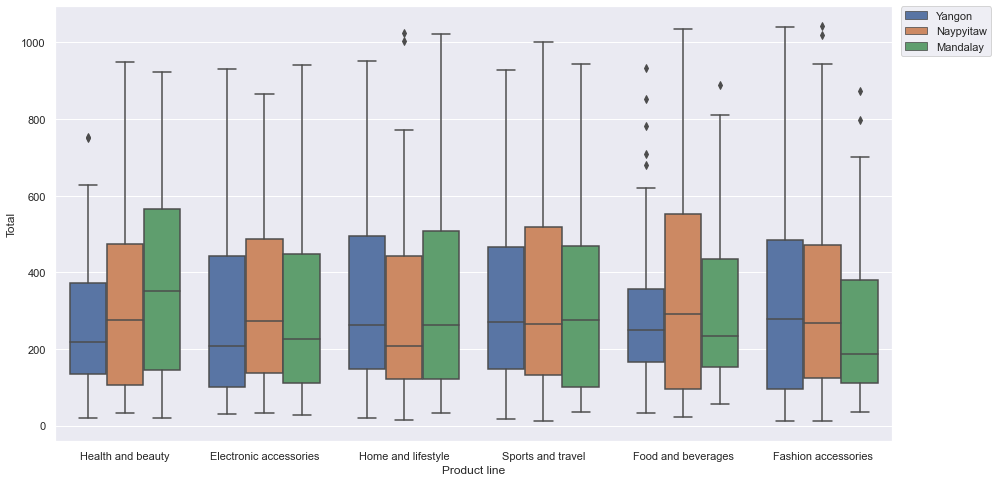

In [162]:
sns.boxplot(x='Product line',y='Total',hue='City',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

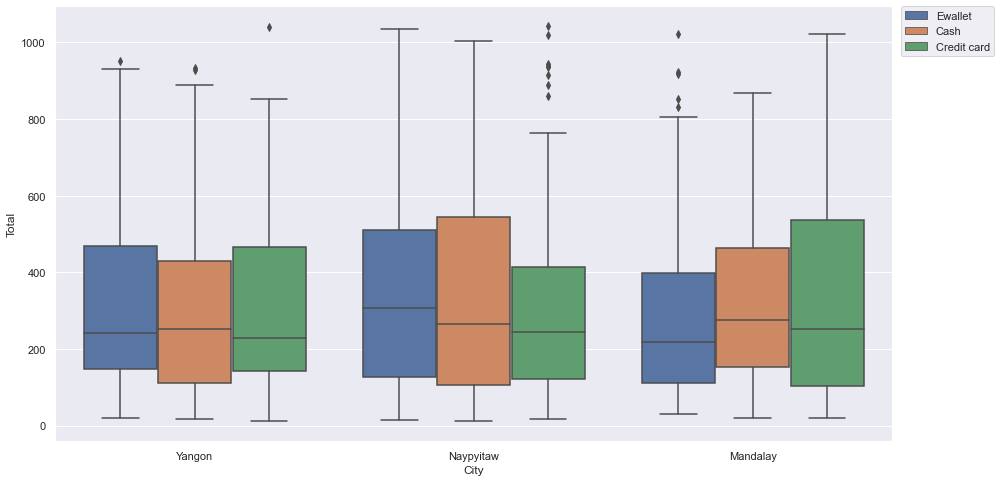

In [163]:
sns.boxplot(x='City',y='Total',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

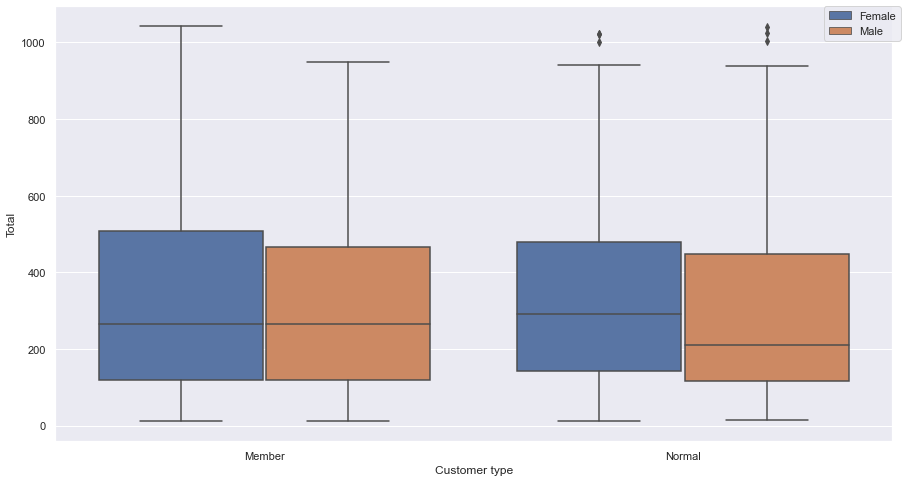

In [164]:
sns.boxplot(x='Customer type',y='Total',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

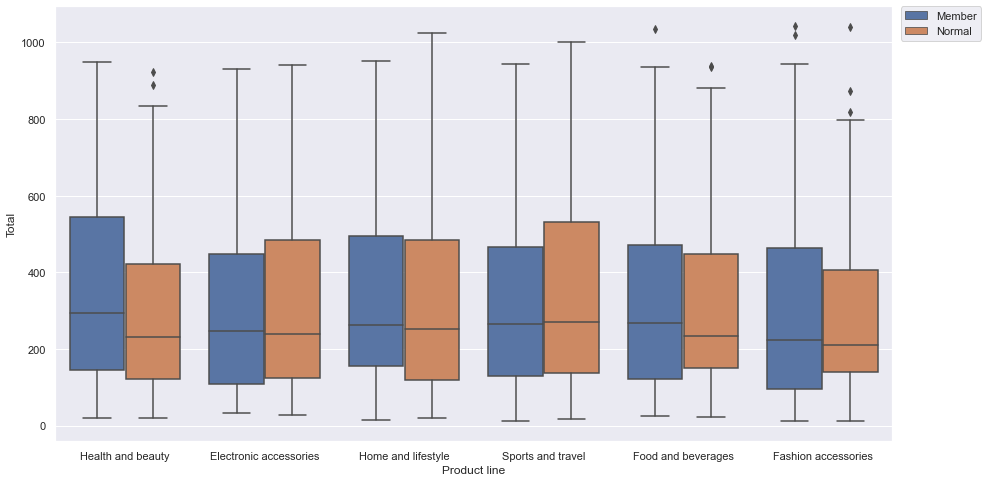

In [165]:
sns.boxplot(x='Product line',y='Total',hue='Customer type',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

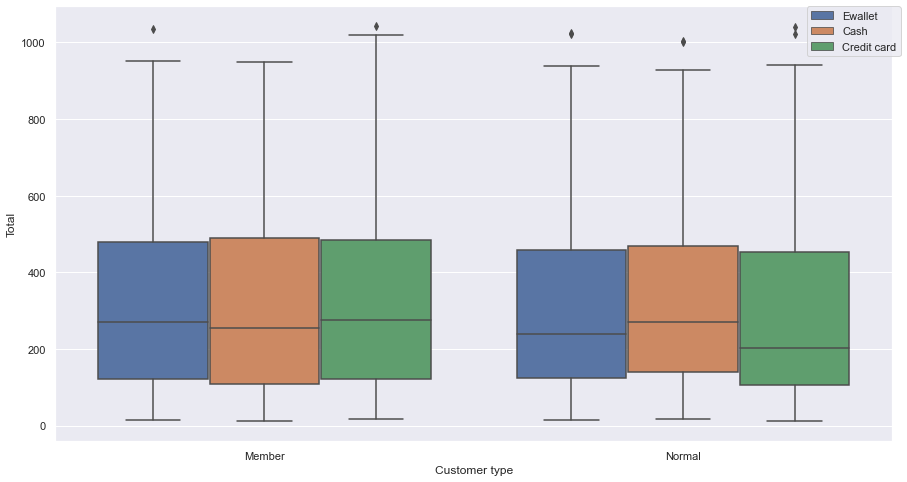

In [166]:
sns.boxplot(x='Customer type',y='Total',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

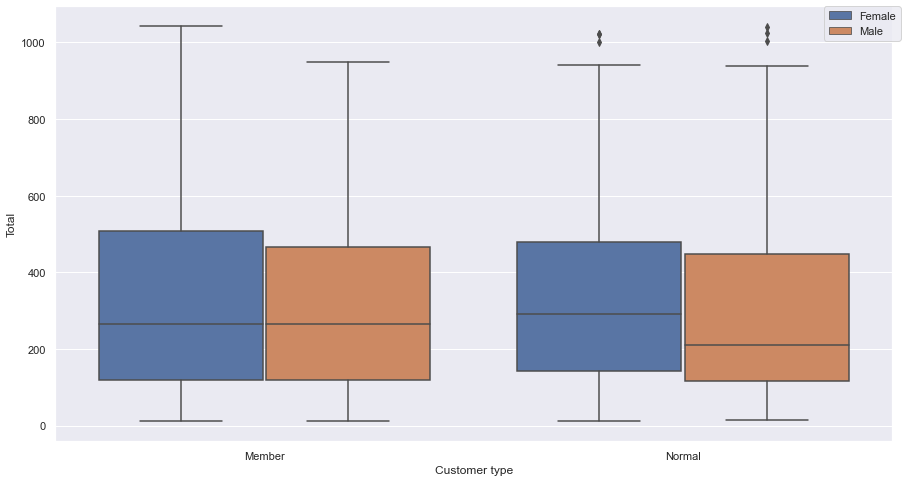

In [167]:
sns.boxplot(x='Customer type',y='Total',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

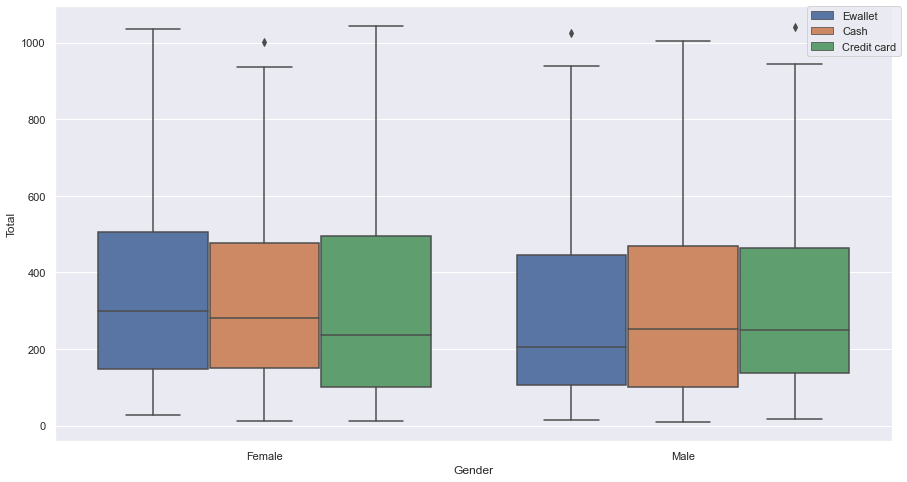

In [168]:
sns.boxplot(x='Gender',y='Total',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

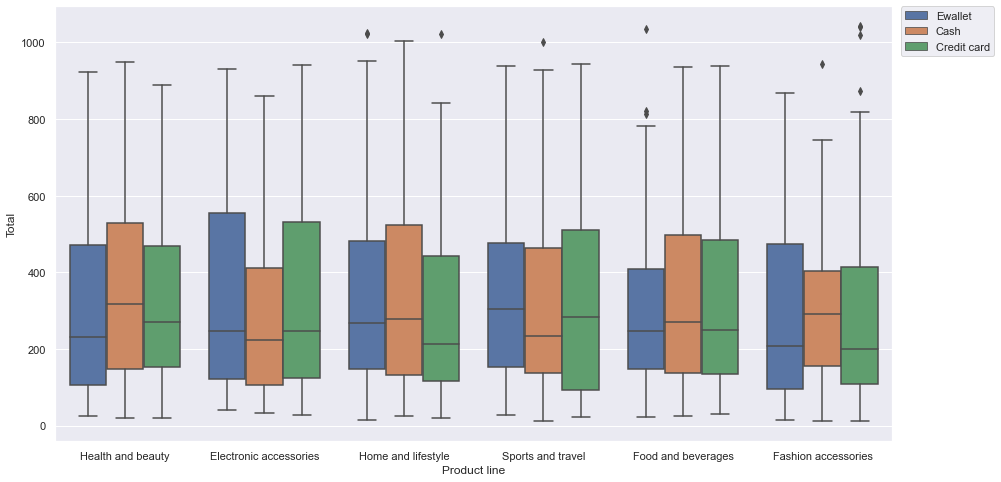

In [169]:
sns.boxplot(x='Product line',y='Total',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

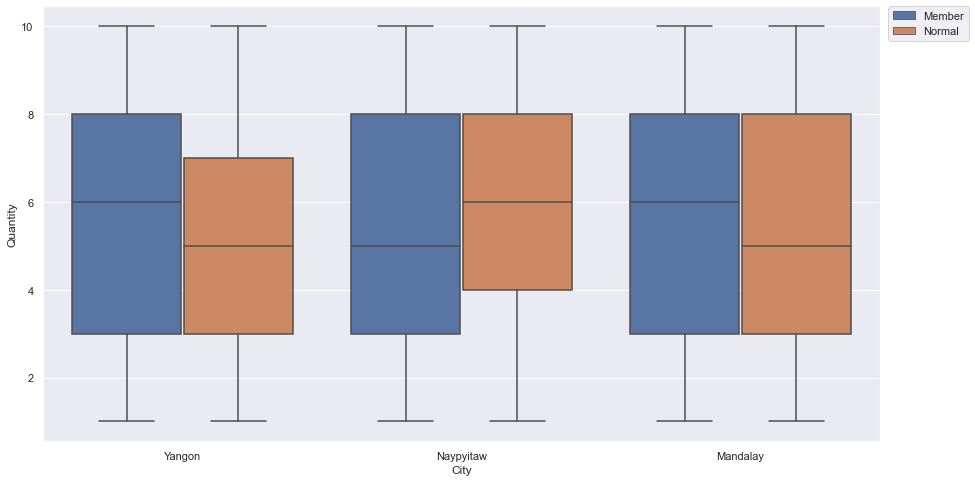

In [170]:
sns.boxplot(x='City',y='Quantity',hue='Customer type',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

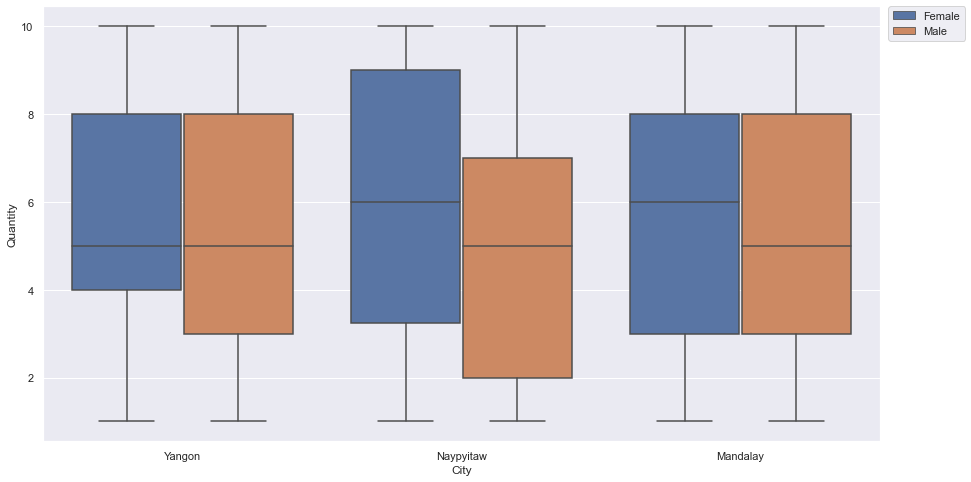

In [171]:
sns.boxplot(x='City',y='Quantity',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

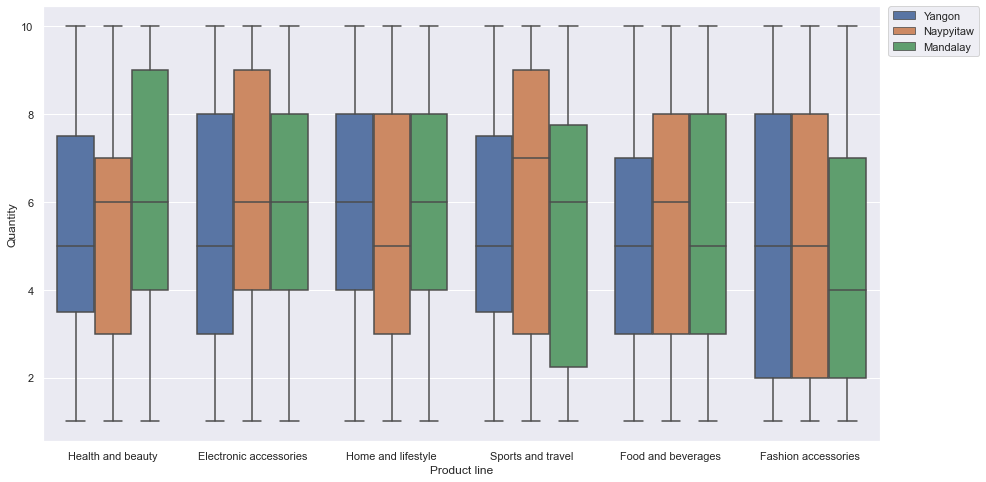

In [172]:
sns.boxplot(x='Product line',y='Quantity',hue='City',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

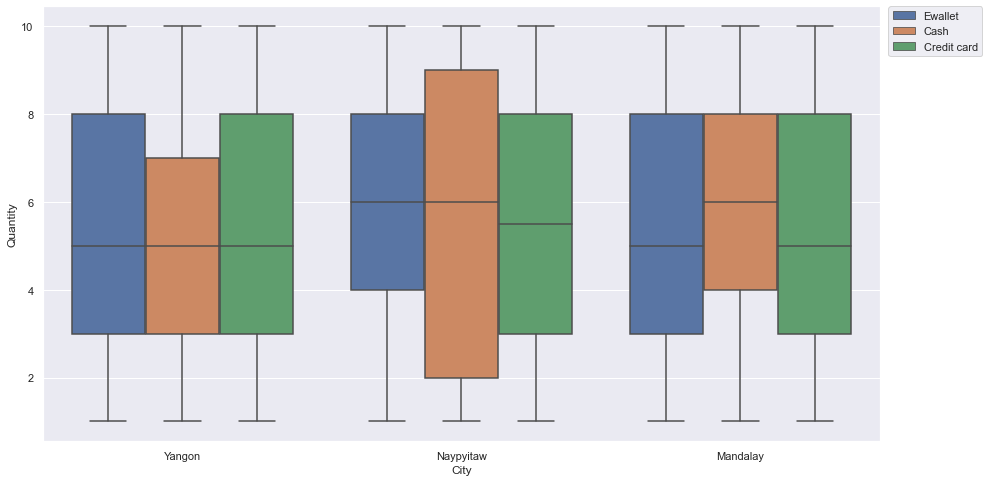

In [173]:
sns.boxplot(x='City',y='Quantity',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

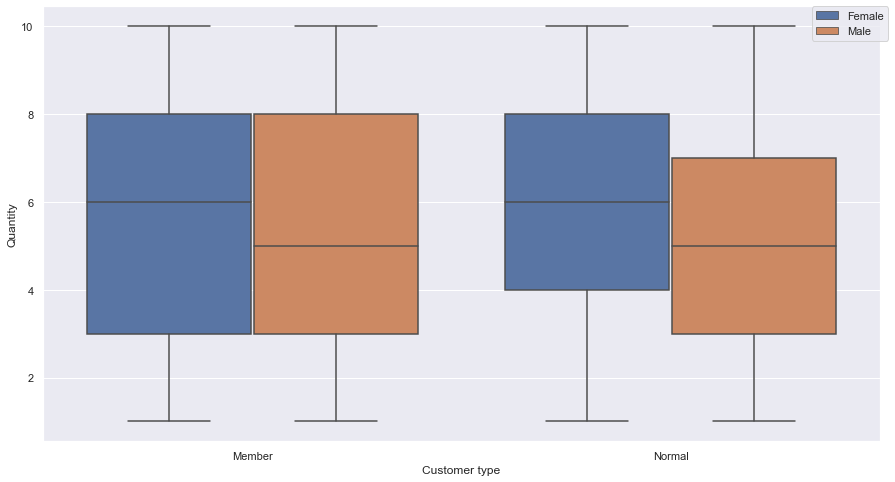

In [174]:
sns.boxplot(x='Customer type',y='Quantity',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

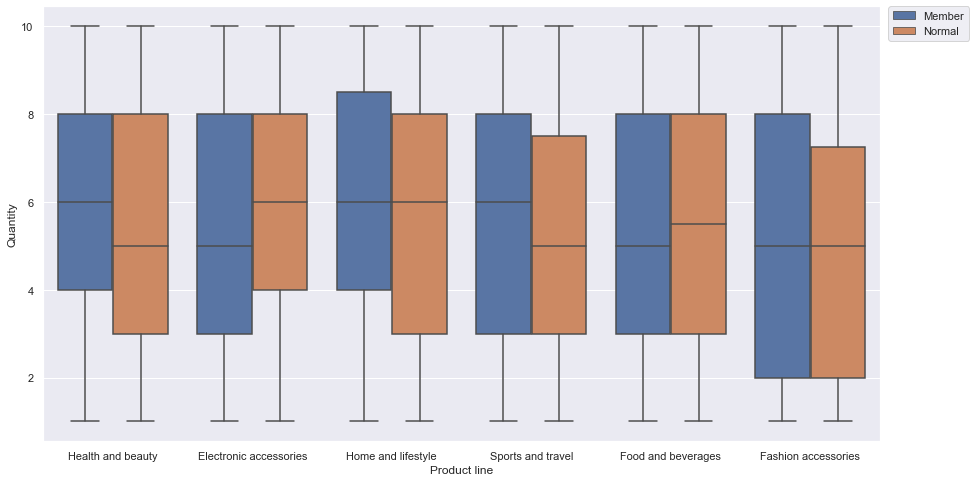

In [175]:
sns.boxplot(x='Product line',y='Quantity',hue='Customer type',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

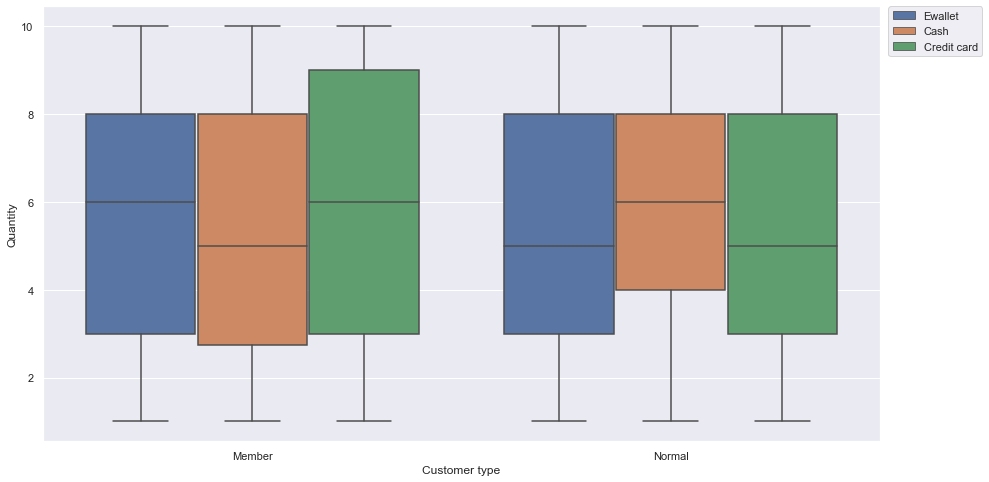

In [176]:
sns.boxplot(x='Customer type',y='Quantity',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

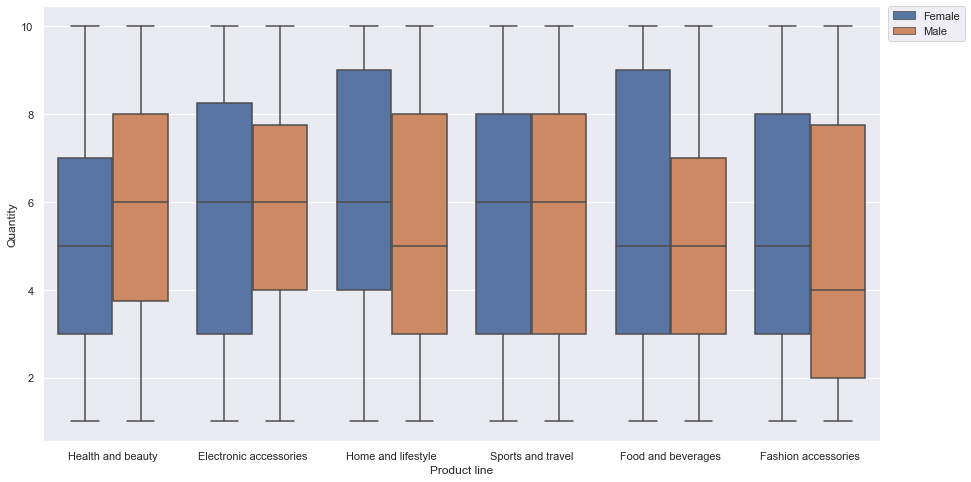

In [177]:
sns.boxplot(x='Product line',y='Quantity',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

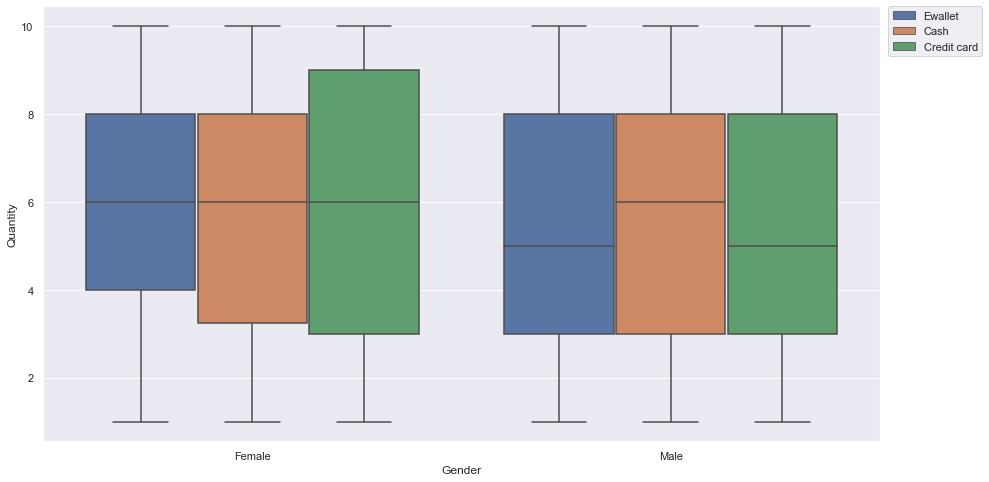

In [178]:
sns.boxplot(x='Gender',y='Quantity',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

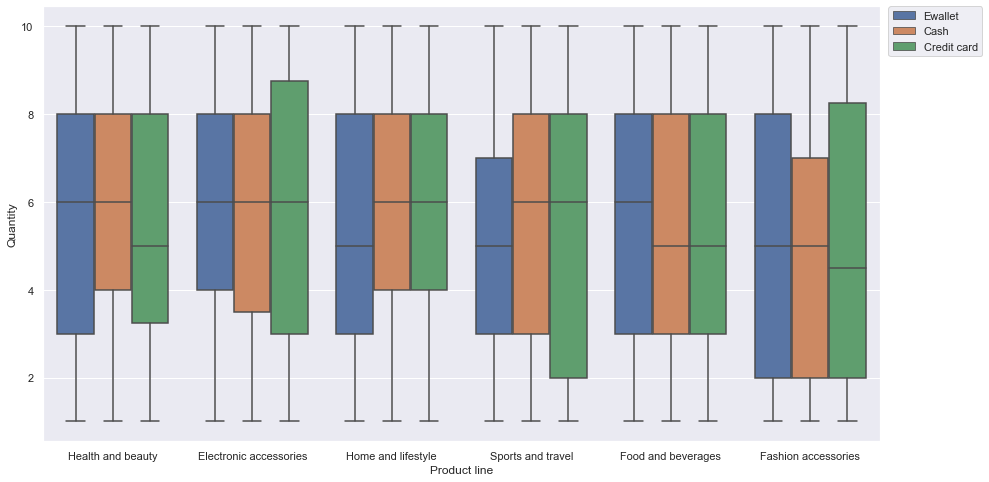

In [179]:
sns.boxplot(x='Product line',y='Quantity',hue='Payment',data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## (2.5) Time analysis

In [180]:
#checing the type of data
df.dtypes

Unnamed: 0                   int64
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [181]:
#Converting date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [182]:
df.dtypes

Unnamed: 0                          int64
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [183]:
len(df['Date'].unique())

89

In [184]:
#Creating the Calendar table
df['Date'] = pd.to_datetime(df['Date'])
calendar_df = pd.DataFrame(df['Date'].unique(),columns=['Date'])
calendar_df['Month'] = calendar_df['Date'].dt.month
calendar_df['Day'] = calendar_df['Date'].dt.day
calendar_df['Year'] = calendar_df['Date'].dt.year
calendar_df['Month_Name'] = calendar_df['Date'].dt.strftime('%b')
calendar_df['Week_Name'] = calendar_df['Date'].dt.strftime('%A')
calendar_df.head()

,Date,Month,Day,Year,Month_Name,Week_Name
0,2019-01-05,1,5,2019,Jan,Saturday
1,2019-03-08,3,8,2019,Mar,Friday
2,2019-03-03,3,3,2019,Mar,Sunday
3,2019-01-27,1,27,2019,Jan,Sunday
4,2019-02-08,2,8,2019,Feb,Friday


In [185]:
calendar_df['Month_Name'].unique()

array(['Jan', 'Mar', 'Feb'], dtype=object)

In [186]:
df_with_calendar = pd.merge(df,calendar_df,how='left')
df_with_calendar.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Year,Month_Name,Week_Name
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,Ewallet,522.83,4.761905,26.1415,9.1,1,5,2019,Jan,Saturday
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,Cash,76.40,4.761905,3.8200,9.6,3,8,2019,Mar,Friday
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,Mar,Sunday
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,...,Ewallet,465.76,4.761905,23.2880,8.4,1,27,2019,Jan,Sunday
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,...,Ewallet,604.17,4.761905,30.2085,5.3,2,8,2019,Feb,Friday


In [187]:
#analizing the time

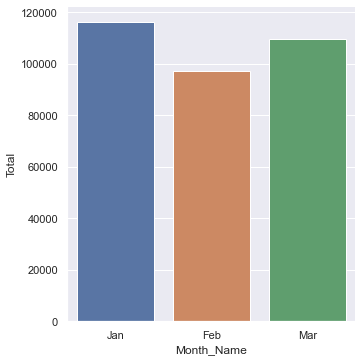

In [188]:
month = df_with_calendar.groupby('Month_Name')['Total'].sum().to_frame().reset_index()
sns.catplot(kind='bar',x='Month_Name',y='Total',order=['Jan','Feb','Mar'],data=month)

In [189]:
def barplot_time(x,y,hue):
    month = df_with_calendar.groupby([x,hue])[y].sum().to_frame().reset_index()
    sns.catplot(kind='bar',x=x,y=y,hue=hue,order=['Jan','Feb','Mar'],data=month)

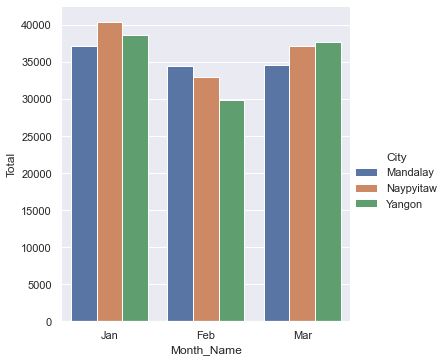

In [190]:
barplot_time('Month_Name','Total','City')

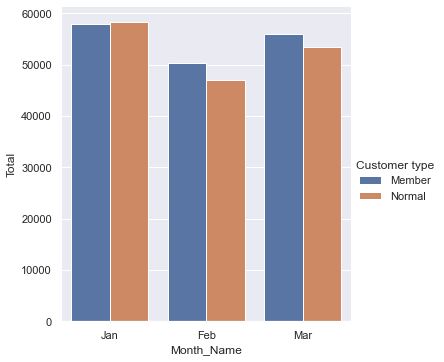

In [191]:
barplot_time('Month_Name','Total','Customer type')

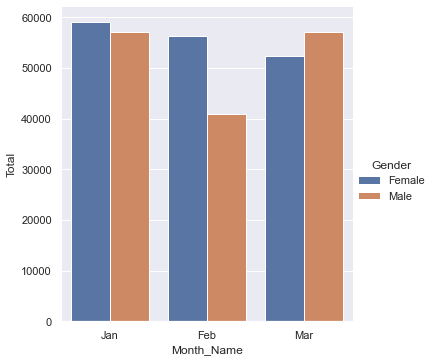

In [192]:
barplot_time('Month_Name','Total','Gender')

In [193]:
#Feb has a lot more womans buying

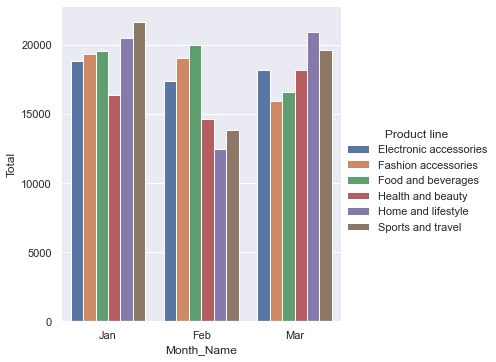

In [194]:
barplot_time('Month_Name','Total','Product line')

In [195]:
#Feb had a higher Food sell and a lower home sell

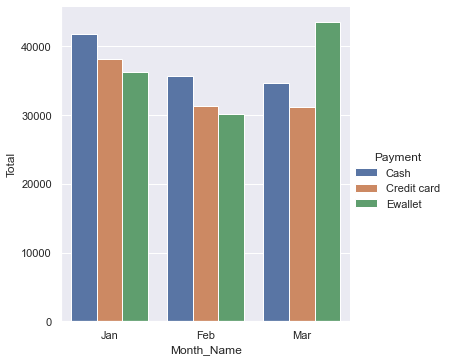

In [196]:
barplot_time('Month_Name','Total','Payment')

In [197]:
#March they paid a lot more in Ewallet

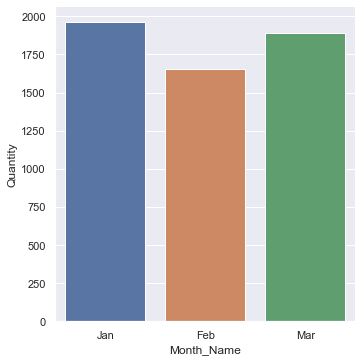

In [198]:
month = df_with_calendar.groupby('Month_Name')['Quantity'].sum().to_frame().reset_index()
sns.catplot(kind='bar',x='Month_Name',y='Quantity',order=['Jan','Feb','Mar'],data=month)

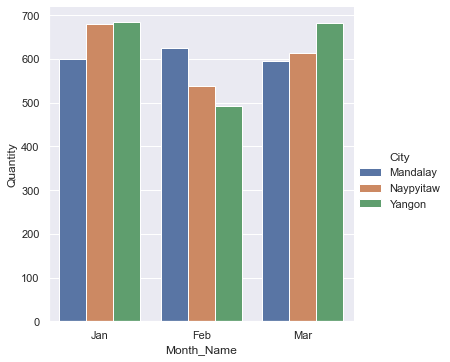

In [199]:
barplot_time('Month_Name','Quantity','City')

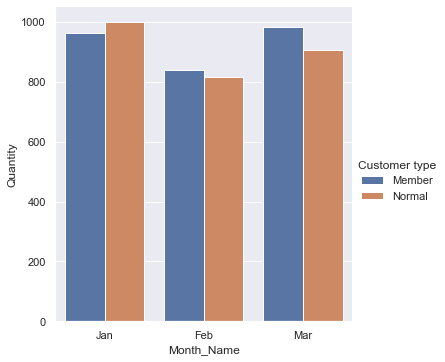

In [200]:
barplot_time('Month_Name','Quantity','Customer type')

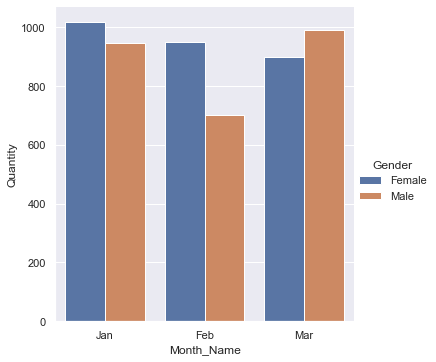

In [201]:
barplot_time('Month_Name','Quantity','Gender')

In [202]:
#Feb womans bought a lo more itens

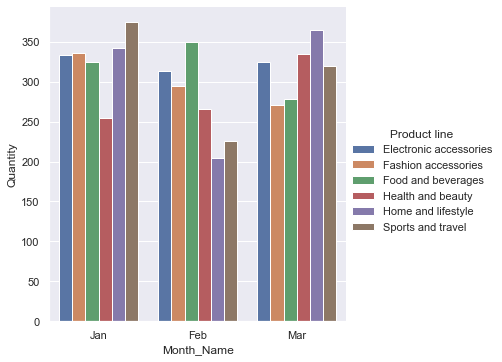

In [203]:
barplot_time('Month_Name','Quantity','Product line')

In [204]:
#Feb had a higher Food quantity sell and a lower home quantity sell.

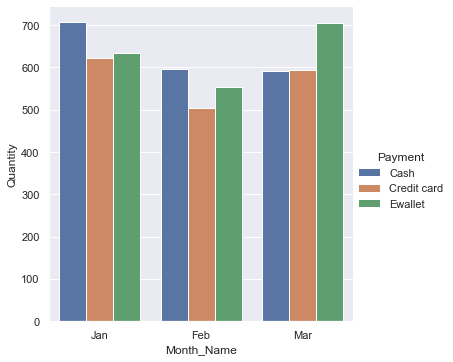

In [205]:
barplot_time('Month_Name','Quantity','Payment')

# (3) Exporting the data frame

In [206]:
calendar_df.to_csv('./data/calendar.csv')

In [207]:
df.to_csv('./data/df.csv')